# Try different models

This jupyter notebook is dedicated to training and evaluating different models

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb

## 1. Open and view all the files

In [71]:
train=pd.read_csv('../data/flat_train.csv',index_col=0)
test=pd.read_csv('../data/flat_test.csv',index_col=0)
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)
isolates_list = [line.rstrip('\n') for line in open('../data/isolates.txt')]
isolates_list_test = [line.rstrip('\n') for line in open('../data/isolates_test.txt')]
genes_column_labels_df=pd.read_csv('../data/genes_column_labels.csv',index_col=0)
genes_list = [line.rstrip('\n') for line in open('../data/genes_to_keep.txt')]

In [3]:
train.head()

,PF3D7_1360200_24HR_DHA,PF3D7_1360200_24HR_UT,PF3D7_1360200_6HR_DHA,PF3D7_1360200_6HR_UT,PF3D7_1212800_24HR_DHA,PF3D7_1212800_24HR_UT,PF3D7_1212800_6HR_DHA,PF3D7_1212800_6HR_UT,PF3D7_1234600_24HR_DHA,PF3D7_1234600_24HR_UT,...,PF3D7_0618500_DHA_UT_6HR,PF3D7_0618500_DHA_UT_24HR,PF3D7_0628200_24HR_6HR_DHA,PF3D7_0628200_24_6HR_UT,PF3D7_0628200_DHA_UT_6HR,PF3D7_0628200_DHA_UT_24HR,PF3D7_1368700_24HR_6HR_DHA,PF3D7_1368700_24_6HR_UT,PF3D7_1368700_DHA_UT_6HR,PF3D7_1368700_DHA_UT_24HR
isolate_01,-1.237558,0.196928,-0.539628,0.232753,0.631145,0.005077,0.451263,0.080951,0.432115,-0.406583,...,0.571128,0.564089,-0.013649,-0.384448,-0.422965,-0.052167,-0.330049,-0.132059,0.561004,0.363013
isolate_02,-0.398779,-0.374733,0.015598,-0.385285,0.034129,0.536841,0.156295,0.431583,-0.359269,-0.187211,...,-0.023408,-0.688128,0.286911,-0.028067,-0.129251,0.185726,0.163327,0.298354,0.191827,0.056801
isolate_03,-0.277068,-0.954536,0.144117,-1.065880,0.387218,0.556922,0.230177,0.444599,0.202430,0.167307,...,-1.236190,-0.663151,0.129896,-0.026631,0.066985,0.223512,0.400941,0.138671,0.331753,0.594023
isolate_04,0.140547,-0.054547,-0.388522,-0.722052,-0.119731,-0.158099,0.466390,0.673041,-0.465047,-0.738471,...,0.460820,0.578757,-0.041681,0.330944,-0.031242,-0.403866,-0.259940,-0.192218,0.147535,0.079813
isolate_05,0.337845,-0.991300,-0.103856,0.030470,-0.059112,0.446838,0.164930,-0.134692,-0.797104,0.297453,...,0.695048,-0.797551,0.268183,-0.000600,-0.000899,0.267883,0.463178,-0.175036,0.013171,0.651385


In [4]:
IC50.head()

,DHA_IC50
isolate_01,2.177
isolate_02,1.697
isolate_03,1.799
isolate_04,0.710
isolate_05,2.025


In [5]:
test.head()

,PF3D7_1360200_24HR_DHA,PF3D7_1360200_24HR_UT,PF3D7_1360200_6HR_DHA,PF3D7_1360200_6HR_UT,PF3D7_1212800_24HR_DHA,PF3D7_1212800_24HR_UT,PF3D7_1212800_6HR_DHA,PF3D7_1212800_6HR_UT,PF3D7_1234600_24HR_DHA,PF3D7_1234600_24HR_UT,...,PF3D7_0618500_DHA_UT_6HR,PF3D7_0618500_DHA_UT_24HR,PF3D7_0628200_24HR_6HR_DHA,PF3D7_0628200_24_6HR_UT,PF3D7_0628200_DHA_UT_6HR,PF3D7_0628200_DHA_UT_24HR,PF3D7_1368700_24HR_6HR_DHA,PF3D7_1368700_24_6HR_UT,PF3D7_1368700_DHA_UT_6HR,PF3D7_1368700_DHA_UT_24HR
0,-0.174775,-0.295609,-0.416325,0.298822,0.128111,0.561929,0.345033,0.056966,-0.194875,-0.170907,...,0.344871,-0.621592,-0.126831,-0.194757,-0.121074,-0.053148,-0.865734,-0.955845,-0.291102,-0.200991
1,0.399533,0.146867,0.324318,0.315899,0.066858,0.027401,0.067937,-0.464352,-0.138635,-0.733134,...,0.047088,0.380829,0.172600,0.018954,-0.089144,0.064502,-0.213451,0.608781,0.594650,-0.227582
2,-0.176645,-0.544585,0.019547,-0.417121,0.138302,0.526993,0.138940,-0.084193,-0.051677,-0.083284,...,0.306211,-0.093699,-0.119335,0.023164,0.169706,0.027207,-0.484834,0.364730,0.320544,-0.529020
3,-0.417563,-0.403714,0.338701,0.404703,0.301630,0.463055,0.053077,0.119237,-0.006026,0.184238,...,1.108617,0.198459,-0.302420,-0.342440,0.042755,0.082776,0.251723,-0.637584,-0.952582,-0.063275
4,-0.479479,-0.105337,0.544339,-0.924440,0.221467,0.114849,-0.033903,0.292947,0.130474,-0.274636,...,-0.703833,0.573340,-0.224813,0.068472,0.060340,-0.232946,-0.898682,0.426429,0.804087,-0.521024


In [6]:
isolates_list

['isolate_01',
 'isolate_02',
 'isolate_03',
 'isolate_04',
 'isolate_05',
 'isolate_06',
 'isolate_07',
 'isolate_08',
 'isolate_09',
 'isolate_10',
 'isolate_11',
 'isolate_12',
 'isolate_13',
 'isolate_14',
 'isolate_15',
 'isolate_16',
 'isolate_17',
 'isolate_18',
 'isolate_19',
 'isolate_20',
 'isolate_21',
 'isolate_22',
 'isolate_23',
 'isolate_24',
 'isolate_25',
 'isolate_26',
 'isolate_27',
 'isolate_28',
 'isolate_29',
 'isolate_30']

In [7]:
genes_column_labels_df

,PF3D7_1360200,PF3D7_1212800,PF3D7_1234600,PF3D7_1406700,PF3D7_1229400,PF3D7_0208200,PF3D7_1220900,PF3D7_0207500,PF3D7_0315100,PF3D7_1340700,...,PF3D7_1116400,PF3D7_1129100,PF3D7_1418000,PF3D7_0208600,PF3D7_1231100,PF3D7_1330600,PF3D7_1450100,PF3D7_0618500,PF3D7_0628200,PF3D7_1368700
0,PF3D7_1360200_24HR_DHA,PF3D7_1212800_24HR_DHA,PF3D7_1234600_24HR_DHA,PF3D7_1406700_24HR_DHA,PF3D7_1229400_24HR_DHA,PF3D7_0208200_24HR_DHA,PF3D7_1220900_24HR_DHA,PF3D7_0207500_24HR_DHA,PF3D7_0315100_24HR_DHA,PF3D7_1340700_24HR_DHA,...,PF3D7_1116400_24HR_DHA,PF3D7_1129100_24HR_DHA,PF3D7_1418000_24HR_DHA,PF3D7_0208600_24HR_DHA,PF3D7_1231100_24HR_DHA,PF3D7_1330600_24HR_DHA,PF3D7_1450100_24HR_DHA,PF3D7_0618500_24HR_DHA,PF3D7_0628200_24HR_DHA,PF3D7_1368700_24HR_DHA
1,PF3D7_1360200_24HR_UT,PF3D7_1212800_24HR_UT,PF3D7_1234600_24HR_UT,PF3D7_1406700_24HR_UT,PF3D7_1229400_24HR_UT,PF3D7_0208200_24HR_UT,PF3D7_1220900_24HR_UT,PF3D7_0207500_24HR_UT,PF3D7_0315100_24HR_UT,PF3D7_1340700_24HR_UT,...,PF3D7_1116400_24HR_UT,PF3D7_1129100_24HR_UT,PF3D7_1418000_24HR_UT,PF3D7_0208600_24HR_UT,PF3D7_1231100_24HR_UT,PF3D7_1330600_24HR_UT,PF3D7_1450100_24HR_UT,PF3D7_0618500_24HR_UT,PF3D7_0628200_24HR_UT,PF3D7_1368700_24HR_UT
2,PF3D7_1360200_6HR_DHA,PF3D7_1212800_6HR_DHA,PF3D7_1234600_6HR_DHA,PF3D7_1406700_6HR_DHA,PF3D7_1229400_6HR_DHA,PF3D7_0208200_6HR_DHA,PF3D7_1220900_6HR_DHA,PF3D7_0207500_6HR_DHA,PF3D7_0315100_6HR_DHA,PF3D7_1340700_6HR_DHA,...,PF3D7_1116400_6HR_DHA,PF3D7_1129100_6HR_DHA,PF3D7_1418000_6HR_DHA,PF3D7_0208600_6HR_DHA,PF3D7_1231100_6HR_DHA,PF3D7_1330600_6HR_DHA,PF3D7_1450100_6HR_DHA,PF3D7_0618500_6HR_DHA,PF3D7_0628200_6HR_DHA,PF3D7_1368700_6HR_DHA
3,PF3D7_1360200_6HR_UT,PF3D7_1212800_6HR_UT,PF3D7_1234600_6HR_UT,PF3D7_1406700_6HR_UT,PF3D7_1229400_6HR_UT,PF3D7_0208200_6HR_UT,PF3D7_1220900_6HR_UT,PF3D7_0207500_6HR_UT,PF3D7_0315100_6HR_UT,PF3D7_1340700_6HR_UT,...,PF3D7_1116400_6HR_UT,PF3D7_1129100_6HR_UT,PF3D7_1418000_6HR_UT,PF3D7_0208600_6HR_UT,PF3D7_1231100_6HR_UT,PF3D7_1330600_6HR_UT,PF3D7_1450100_6HR_UT,PF3D7_0618500_6HR_UT,PF3D7_0628200_6HR_UT,PF3D7_1368700_6HR_UT
4,PF3D7_1360200_24HR_6HR_DHA,PF3D7_1212800_24HR_6HR_DHA,PF3D7_1234600_24HR_6HR_DHA,PF3D7_1406700_24HR_6HR_DHA,PF3D7_1229400_24HR_6HR_DHA,PF3D7_0208200_24HR_6HR_DHA,PF3D7_1220900_24HR_6HR_DHA,PF3D7_0207500_24HR_6HR_DHA,PF3D7_0315100_24HR_6HR_DHA,PF3D7_1340700_24HR_6HR_DHA,...,PF3D7_1116400_24HR_6HR_DHA,PF3D7_1129100_24HR_6HR_DHA,PF3D7_1418000_24HR_6HR_DHA,PF3D7_0208600_24HR_6HR_DHA,PF3D7_1231100_24HR_6HR_DHA,PF3D7_1330600_24HR_6HR_DHA,PF3D7_1450100_24HR_6HR_DHA,PF3D7_0618500_24HR_6HR_DHA,PF3D7_0628200_24HR_6HR_DHA,PF3D7_1368700_24HR_6HR_DHA
5,PF3D7_1360200_24_6HR_UT,PF3D7_1212800_24_6HR_UT,PF3D7_1234600_24_6HR_UT,PF3D7_1406700_24_6HR_UT,PF3D7_1229400_24_6HR_UT,PF3D7_0208200_24_6HR_UT,PF3D7_1220900_24_6HR_UT,PF3D7_0207500_24_6HR_UT,PF3D7_0315100_24_6HR_UT,PF3D7_1340700_24_6HR_UT,...,PF3D7_1116400_24_6HR_UT,PF3D7_1129100_24_6HR_UT,PF3D7_1418000_24_6HR_UT,PF3D7_0208600_24_6HR_UT,PF3D7_1231100_24_6HR_UT,PF3D7_1330600_24_6HR_UT,PF3D7_1450100_24_6HR_UT,PF3D7_0618500_24_6HR_UT,PF3D7_0628200_24_6HR_UT,PF3D7_1368700_24_6HR_UT
6,PF3D7_1360200_DHA_UT_6HR,PF3D7_1212800_DHA_UT_6HR,PF3D7_1234600_DHA_UT_6HR,PF3D7_1406700_DHA_UT_6HR,PF3D7_1229400_DHA_UT_6HR,PF3D7_0208200_DHA_UT_6HR,PF3D7_1220900_DHA_UT_6HR,PF3D7_0207500_DHA_UT_6HR,PF3D7_0315100_DHA_UT_6HR,PF3D7_1340700_DHA_UT_6HR,...,PF3D7_1116400_DHA_UT_6HR,PF3D7_1129100_DHA_UT_6HR,PF3D7_1418000_DHA_UT_6HR,PF3D7_0208600_DHA_UT_6HR,PF3D7_1231100_DHA_UT_6HR,PF3D7_1330600_DHA_UT_6HR,PF3D7_1450100_DHA_UT_6HR,PF3D7_0618500_DHA_UT_6HR,PF3D7_0628200_DHA_UT_6HR,PF3D7_1368700_DHA_UT_6HR
7,PF3D7_1360200_DHA_UT_24HR,PF3D7_1212800_DHA_UT_24HR,PF3D7_1234600_DHA_UT_24HR,PF3D7_1406700_DHA_UT_24HR,PF3D7_1229400_DHA_UT_24HR,PF3D7_0208200_DHA_UT_24HR,PF3D7_1220900_DHA_UT_24HR,PF3D7_0207500_DHA_UT_24HR,PF3D7_0315100_DHA_UT_24HR,PF3D7_1340700_DHA_UT_24HR,...,PF3D7_1116400_DHA_UT_24HR,PF3D7_1129100_DHA_UT_24HR,PF3D7_1418000_DHA_UT_24HR,PF3D7_0208600_DHA_UT_24HR,PF3D7_1231100_DHA_UT_24

## 2. Hacer modelo lineal de manera incremental (un gen con sus 8 valores a la vez)

### Isolates for validation
* isolate_07
* isolate_27
* isolate_18
* isolate_11
* isolate_16

### Models to try out
* [LASSO (R2)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Linear Regression (RMSE)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2.1 Create the functions

In [39]:
#Global variables
#val_isolates
#genes_dict
val_isolates=['isolate_07','isolate_11','isolate_16','isolate_18','isolate_27']

In [101]:
def getGenesColumnLabels(genes):
    genes_list=[]
    for gene in genes:
        genes_list=genes_list+list(genes_column_labels_df[gene])[0:n]
    return genes_list

In [54]:
getGenesColumnLabels(selected_genes)

['PF3D7_0730200_24HR_DHA',
 'PF3D7_0730200_24HR_UT',
 'PF3D7_0730200_6HR_DHA',
 'PF3D7_0730200_6HR_UT',
 'PF3D7_0730200_24HR_6HR_DHA',
 'PF3D7_0730200_24_6HR_UT',
 'PF3D7_0730200_DHA_UT_6HR',
 'PF3D7_0730200_DHA_UT_24HR',
 'PF3D7_1341600_24HR_DHA',
 'PF3D7_1341600_24HR_UT',
 'PF3D7_1341600_6HR_DHA',
 'PF3D7_1341600_6HR_UT',
 'PF3D7_1341600_24HR_6HR_DHA',
 'PF3D7_1341600_24_6HR_UT',
 'PF3D7_1341600_DHA_UT_6HR',
 'PF3D7_1341600_DHA_UT_24HR',
 'PF3D7_1426200_24HR_DHA',
 'PF3D7_1426200_24HR_UT',
 'PF3D7_1426200_6HR_DHA',
 'PF3D7_1426200_6HR_UT',
 'PF3D7_1426200_24HR_6HR_DHA',
 'PF3D7_1426200_24_6HR_UT',
 'PF3D7_1426200_DHA_UT_6HR',
 'PF3D7_1426200_DHA_UT_24HR']

In [11]:
def findTrainIsolates(val_isolates,df):
    train_isolates=list(set(df.index)-set(val_isolates))
    train_isolates.sort()
    return train_isolates

In [12]:
def filterDfByIsolates(isolates,df):
    filtered_df=df.loc[isolates]
    return filtered_df

In [73]:
def filterDfByGenes(genes,df):
    #genes is a list of genes: e.g.['PF3D7_1360200','PF3D7_1212800']
    genes_to_filter=getGenesColumnLabels(genes)
    filtered_df=df[genes_to_filter]
    return filtered_df

In [14]:
def trainModel(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

### 2.2 Train the model

In [95]:
selected_genes=[]
selected_scores=[0]
N=10
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModel(genes_to_use,val_isolates,train,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene

    
    if best_score_so_far>selected_scores[-1]:
        selected_genes.append(best_gene_so_far)
        selected_scores.append(best_score_so_far)

<function matplotlib.pyplot.show(*args, **kw)>

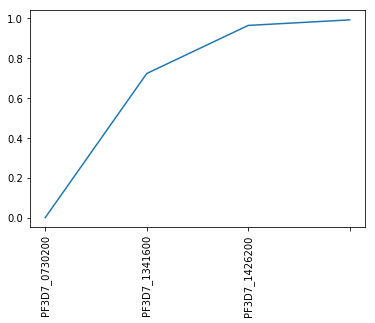

In [96]:
#N=100
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')
plt.show

In [97]:
selected_scores

[0, 0.7232934274782723, 0.9647245375940365, 0.9926399964586666]

### 2.3 Try the model with the three selected genes

In [78]:
selected_genes=['PF3D7_0730200','PF3D7_1341600','PF3D7_1426200']

In [44]:
def tryModel(genes,val_isolates,dfx,dfy):
    model_info={}
    
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    y_pred=model.predict(X_val)
    
    score=model.score(X_val,y_val)
    
    model_info['y']=y.values
    model_info['y_val']=y_val
    model_info['X']=X.values
    model_info['X_val']=X_val
    model_info['y_pred']=y_pred
    model_info['score']=score
    return model_info

In [20]:
#Try the model with the first selected gene
gene=['PF3D7_0730200']

In [79]:
try_model=tryModel(selected_genes,val_isolates,train,IC50)

In [81]:
y=[try_model['y_val'][i][0] for i in range(len(try_model['y_val']))]
y_pred=[try_model['y_pred'][i][0] for i in range(len(try_model['y_pred']))]

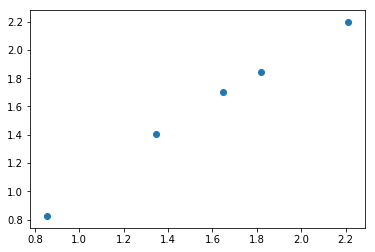

In [82]:
plt.scatter(y,y_pred)

### 2.4 Train the model with all the isolates and only the three selected genes

In [24]:
selected_genes

['PF3D7_0730200', 'PF3D7_1341600', 'PF3D7_1426200']

In [83]:
selected_train=train[getGenesColumnLabels(selected_genes)]
selected_train.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1341600_24HR_DHA,PF3D7_1341600_24HR_UT,...,PF3D7_1341600_DHA_UT_6HR,PF3D7_1341600_DHA_UT_24HR,PF3D7_1426200_24HR_DHA,PF3D7_1426200_24HR_UT,PF3D7_1426200_6HR_DHA,PF3D7_1426200_6HR_UT,PF3D7_1426200_24HR_6HR_DHA,PF3D7_1426200_24_6HR_UT,PF3D7_1426200_DHA_UT_6HR,PF3D7_1426200_DHA_UT_24HR
isolate_01,-0.037031,-0.073334,-0.530240,-0.245317,0.493209,0.171984,-0.284922,0.036303,0.188004,-0.787045,...,0.253384,0.975049,-0.128304,0.715598,0.011499,0.981056,-0.139804,-0.265458,-0.969557,-0.843902
isolate_02,-0.112674,-0.302915,-0.450089,-0.428044,0.337415,0.125129,-0.022045,0.190242,-0.517961,-0.480987,...,-0.250033,-0.036974,0.240229,0.013204,0.108668,0.220774,0.131561,-0.207570,-0.112106,0.227026
isolate_03,0.074458,-0.100457,0.117450,-0.109150,-0.042992,0.008693,0.226599,0.174914,-0.434341,0.022822,...,-0.940996,-0.457163,0.345671,-0.097277,0.413015,-0.258171,-0.067345,0.160894,0.671187,0.442948
isolate_04,-0.321503,-0.201828,-0.112915,-0.380831,-0.208588,0.179003,0.267916,-0.119675,-0.347945,-1.016586,...,0.370128,0.668641,0.017374,0.456434,-0.186565,-0.109549,0.203938,0.565983,-0.077016,-0.439060
isolate_05,-0.038549,-0.250931,-0.265711,-0.085343,0.227162,-0.165588,-0.180369,0.212381,-0.818626,-0.143570,...,0.805311,-0.675056,0.652695,-0.293320,0.351933,0.334961,0.300762,-0.628281,0.016973,0.946015


In [84]:
X=selected_train
y=IC50

model=LinearRegression().fit(X.values,y.values)

### 2.5 Save the model

In [85]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, 'model1_140719.pkl') 

['model1_140719.pkl']

## 3. Use the model on the test data

In [86]:
test.head()

,PF3D7_1360200_24HR_DHA,PF3D7_1360200_24HR_UT,PF3D7_1360200_6HR_DHA,PF3D7_1360200_6HR_UT,PF3D7_1212800_24HR_DHA,PF3D7_1212800_24HR_UT,PF3D7_1212800_6HR_DHA,PF3D7_1212800_6HR_UT,PF3D7_1234600_24HR_DHA,PF3D7_1234600_24HR_UT,...,PF3D7_0618500_DHA_UT_6HR,PF3D7_0618500_DHA_UT_24HR,PF3D7_0628200_24HR_6HR_DHA,PF3D7_0628200_24_6HR_UT,PF3D7_0628200_DHA_UT_6HR,PF3D7_0628200_DHA_UT_24HR,PF3D7_1368700_24HR_6HR_DHA,PF3D7_1368700_24_6HR_UT,PF3D7_1368700_DHA_UT_6HR,PF3D7_1368700_DHA_UT_24HR
isolate_31,-0.174775,-0.295609,-0.416325,0.298822,0.128111,0.561929,0.345033,0.056966,-0.194875,-0.170907,...,0.344871,-0.621592,-0.126831,-0.194757,-0.121074,-0.053148,-0.865734,-0.955845,-0.291102,-0.200991
isolate_32,0.399533,0.146867,0.324318,0.315899,0.066858,0.027401,0.067937,-0.464352,-0.138635,-0.733134,...,0.047088,0.380829,0.172600,0.018954,-0.089144,0.064502,-0.213451,0.608781,0.594650,-0.227582
isolate_33,-0.176645,-0.544585,0.019547,-0.417121,0.138302,0.526993,0.138940,-0.084193,-0.051677,-0.083284,...,0.306211,-0.093699,-0.119335,0.023164,0.169706,0.027207,-0.484834,0.364730,0.320544,-0.529020
isolate_34,-0.417563,-0.403714,0.338701,0.404703,0.301630,0.463055,0.053077,0.119237,-0.006026,0.184238,...,1.108617,0.198459,-0.302420,-0.342440,0.042755,0.082776,0.251723,-0.637584,-0.952582,-0.063275
isolate_35,-0.479479,-0.105337,0.544339,-0.924440,0.221467,0.114849,-0.033903,0.292947,0.130474,-0.274636,...,-0.703833,0.573340,-0.224813,0.068472,0.060340,-0.232946,-0.898682,0.426429,0.804087,-0.521024


### 3.1 Make the IC50 predictions

In [87]:
#Load the model
model_load = joblib.load('../models/model1_140719.pkl') 

In [88]:
selected_test=test[getGenesColumnLabels(selected_genes)]
selected_test.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1341600_24HR_DHA,PF3D7_1341600_24HR_UT,...,PF3D7_1341600_DHA_UT_6HR,PF3D7_1341600_DHA_UT_24HR,PF3D7_1426200_24HR_DHA,PF3D7_1426200_24HR_UT,PF3D7_1426200_6HR_DHA,PF3D7_1426200_6HR_UT,PF3D7_1426200_24HR_6HR_DHA,PF3D7_1426200_24_6HR_UT,PF3D7_1426200_DHA_UT_6HR,PF3D7_1426200_DHA_UT_24HR
isolate_31,-0.703596,-0.700134,-0.272551,-0.040702,-0.431046,-0.659432,-0.231848,-0.003463,-0.858399,-0.277527,...,0.178323,-0.580871,0.329245,0.178702,0.371113,0.707257,-0.041868,-0.528555,-0.336144,0.150544
isolate_32,-0.347220,-0.008325,-0.213340,-0.346004,-0.133880,0.337679,0.132664,-0.338894,-0.599167,-0.773197,...,-0.168488,0.174030,0.645354,0.735466,0.810575,0.376228,-0.165220,0.359238,0.434347,-0.090111
isolate_33,0.047989,-0.684308,-0.351197,-0.047073,0.399185,-0.637235,-0.304124,0.732297,-0.082528,-0.173893,...,0.422157,0.091365,0.018793,0.287341,0.440818,-0.049872,-0.422026,0.337213,0.490690,-0.268549
isolate_34,-0.664713,-0.401648,-0.273990,0.010716,-0.390724,-0.412364,-0.284705,-0.263065,-0.406698,-0.458120,...,0.479332,0.051422,0.170532,0.075933,0.375788,0.925295,-0.205256,-0.849361,-0.549507,0.094599
isolate_35,-0.312158,-0.053026,0.007652,-0.213307,-0.319810,0.160280,0.220958,-0.259132,-0.379456,-0.656161,...,-0.798243,0.276706,0.186138,0.498472,1.244600,-0.329952,-1.058462,0.828424,1.574552,-0.312334


In [89]:
X_test=selected_test
X_test.shape

(25, 24)

In [92]:
IC50_pred=model_load.predict(X_test)

In [94]:
temp_list=[]
for value in IC50_pred:
    temp_list.append(value)
IC50_pred=temp_list

In [ ]:
submission=pd.DataFrame({'Isolate':isolates_list_test,'Predicted_IC50':ic50_pred})

In [ ]:
submission.head()

In [ ]:
submission.to_csv('../submissions/lylat_SubCh1_model1_140719.txt', sep='\t',index=None)

## 4. Confirm that the deltas improve the score of the model

Run section 2.2 again but now each gene of the train set will have four columns ingoring the 4 columns correspondint to the differecial between the isolates sampling condition.

## 4.1 Modify getGenesColumns

In [100]:
getGenesColumnLabels(selected_genes,n=4)

['PF3D7_0730200_24HR_DHA',
 'PF3D7_0730200_24HR_UT',
 'PF3D7_0730200_6HR_DHA',
 'PF3D7_0730200_6HR_UT',
 'PF3D7_1341600_24HR_DHA',
 'PF3D7_1341600_24HR_UT',
 'PF3D7_1341600_6HR_DHA',
 'PF3D7_1341600_6HR_UT',
 'PF3D7_1426200_24HR_DHA',
 'PF3D7_1426200_24HR_UT',
 'PF3D7_1426200_6HR_DHA',
 'PF3D7_1426200_6HR_UT']